In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
climate_data = pd.read_csv("climate_change_dataset.csv")

In [3]:
climate_data.head()

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [4]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

In [6]:
# Data Cleaning: Convert columns to appropriate data types
climate_data['Avg_Temp (°C)'] = pd.to_numeric(climate_data['Avg_Temp (°C)'], errors='coerce')
climate_data['Max_Temp (°C)'] = pd.to_numeric(climate_data['Max_Temp (°C)'], errors='coerce')
climate_data['Min_Temp (°C)'] = pd.to_numeric(climate_data['Min_Temp (°C)'], errors='coerce')
climate_data['Precipitation (mm)'] = pd.to_numeric(climate_data['Precipitation (mm)'], errors='coerce')
climate_data['Humidity (%)'] = pd.to_numeric(climate_data['Humidity (%)'], errors='coerce')
climate_data['Wind_Speed (m/s)'] = pd.to_numeric(climate_data['Wind_Speed (m/s)'], errors='coerce')
climate_data['Solar_Irradiance (W/m²)'] = pd.to_numeric(climate_data['Solar_Irradiance (W/m²)'], errors='coerce')
climate_data['Cloud_Cover (%)'] = pd.to_numeric(climate_data['Cloud_Cover (%)'], errors='coerce')
climate_data['CO2_Concentration (ppm)'] = pd.to_numeric(climate_data['CO2_Concentration (ppm)'], errors='coerce')
climate_data['Latitude'] = pd.to_numeric(climate_data['Latitude'], errors='coerce')
climate_data['Longitude'] = pd.to_numeric(climate_data['Longitude'], errors='coerce')
climate_data['Altitude (m)'] = pd.to_numeric(climate_data['Altitude (m)'], errors='coerce')
climate_data['Proximity_to_Water (km)'] = pd.to_numeric(climate_data['Proximity_to_Water (km)'], errors='coerce')
climate_data['Urbanization_Index'] = pd.to_numeric(climate_data['Urbanization_Index'], errors='coerce')
climate_data['Vegetation_Index'] = pd.to_numeric(climate_data['Vegetation_Index'], errors='coerce')
climate_data['ENSO_Index'] = pd.to_numeric(climate_data['ENSO_Index'], errors='coerce')
climate_data['Particulate_Matter (µg/m³)'] = pd.to_numeric(climate_data['Particulate_Matter (µg/m³)'], errors='coerce')
climate_data['Sea_Surface_Temp (°C)'] = pd.to_numeric(climate_data['Sea_Surface_Temp (°C)'], errors='coerce')

In [7]:
climate_data.isnull().sum()

,0
Year,5
Month,5
Avg_Temp (°C),7
Max_Temp (°C),8
Min_Temp (°C),9
Precipitation (mm),5
Humidity (%),9
Wind_Speed (m/s),3
Solar_Irradiance (W/m²),6
Cloud_Cover (%),5


In [9]:
# Fill missing values for numerical columns with the mean (or median if necessary)
numerical_columns = climate_data.select_dtypes(include=['float64', 'int64']).columns
climate_data[numerical_columns] = climate_data[numerical_columns].fillna(climate_data[numerical_columns].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_columns = climate_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = climate_data[column].mode()[0]  # Get the most frequent value
    climate_data[column].fillna(mode_value, inplace=True)

<ipython-input-9-8be8a78b7cbb>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  climate_data[column].fillna(mode_value, inplace=True)


In [10]:
# Check if missing values are handled
print(climate_data.isnull().sum())

Year                          0
Month                         0
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               0
CO2_Concentration (ppm)       0
Latitude                      0
Longitude                     0
Altitude (m)                  0
Proximity_to_Water (km)       0
Urbanization_Index            0
Vegetation_Index              0
ENSO_Index                    0
Particulate_Matter (µg/m³)    0
Sea_Surface_Temp (°C)         0
dtype: int64


In [26]:
climate_data['Avg_Temp (°C)'].describe()

,Avg_Temp (°C)
count,53.000000
mean,13.018699
std,10.751219
min,-4.965473
25%,4.705118
50%,12.919545
75%,20.751242
max,34.282303


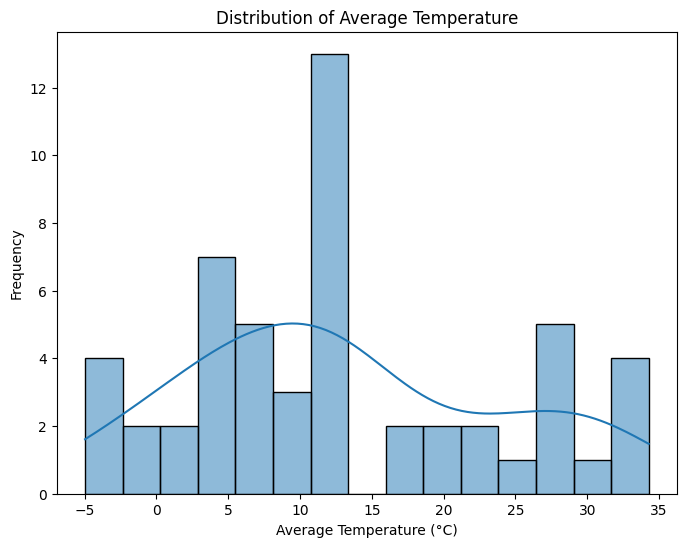

In [11]:
# Create a histogram
plt.figure(figsize=(8,6))
sns.histplot(climate_data['Avg_Temp (°C)'], bins=15, kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

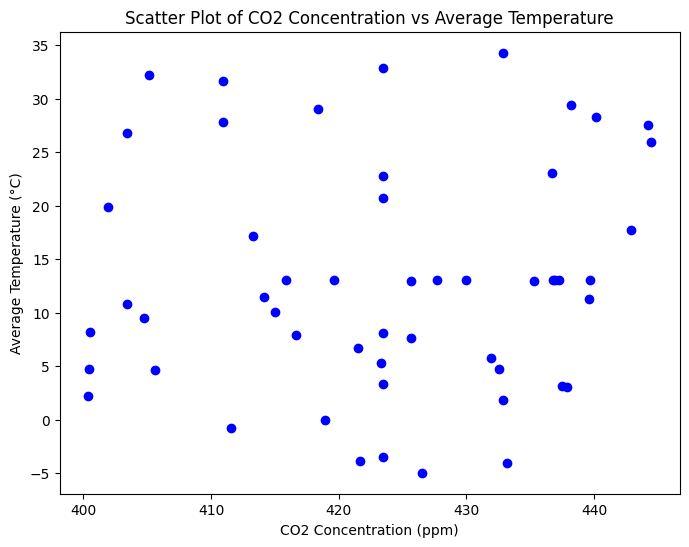

In [12]:
# Line/Scatter plot (Temperature vs CO2 concentration)
plt.figure(figsize=(8,6))
plt.scatter(climate_data['CO2_Concentration (ppm)'], climate_data['Avg_Temp (°C)'], c='blue')
plt.title('Scatter Plot of CO2 Concentration vs Average Temperature')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Average Temperature (°C)')
plt.show()

Correlation Matrix:
                            Avg_Temp (°C)  Max_Temp (°C)  Min_Temp (°C)  \
Avg_Temp (°C)                    1.000000      -0.283239       0.202641   
Max_Temp (°C)                   -0.283239       1.000000       0.004137   
Min_Temp (°C)                    0.202641       0.004137       1.000000   
Precipitation (mm)              -0.112888       0.178876      -0.025858   
Humidity (%)                    -0.078439      -0.014210      -0.154862   
Wind_Speed (m/s)                 0.167708      -0.179213      -0.024254   
Solar_Irradiance (W/m²)         -0.123894       0.251649      -0.133644   
Cloud_Cover (%)                 -0.104472       0.036598       0.003827   
CO2_Concentration (ppm)          0.074685      -0.251719      -0.059153   
Latitude                        -0.077541      -0.119052      -0.003534   
Longitude                       -0.157956       0.021874       0.172007   
Altitude (m)                          NaN            NaN            NaN   
Proxi

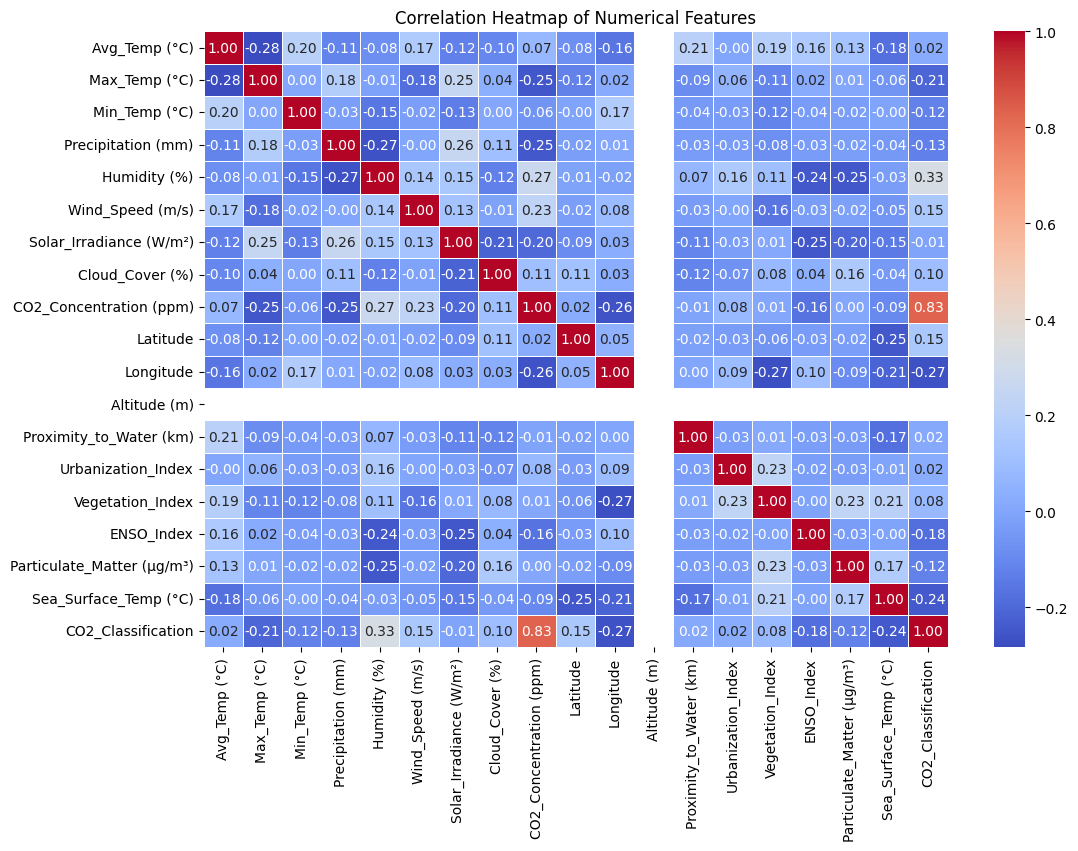

In [25]:
# Select only the numerical columns
numerical_columns = climate_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add a title and display the heatmap
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [13]:
# Clustering: K-Means clustering (Use CO2 Concentration and Avg_Temp for clustering)
# We will standardize the data first to ensure proper scaling
X = climate_data[['CO2_Concentration (ppm)', 'Avg_Temp (°C)']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

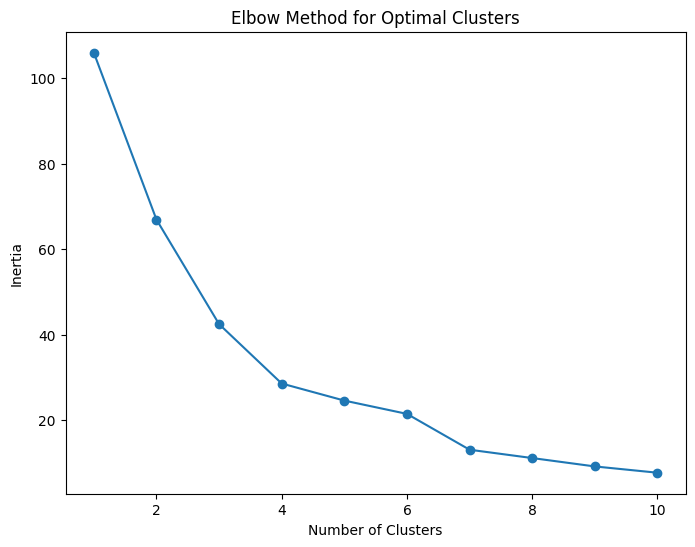

In [16]:
# Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
climate_data['Cluster'] = kmeans.fit_predict(X_scaled)

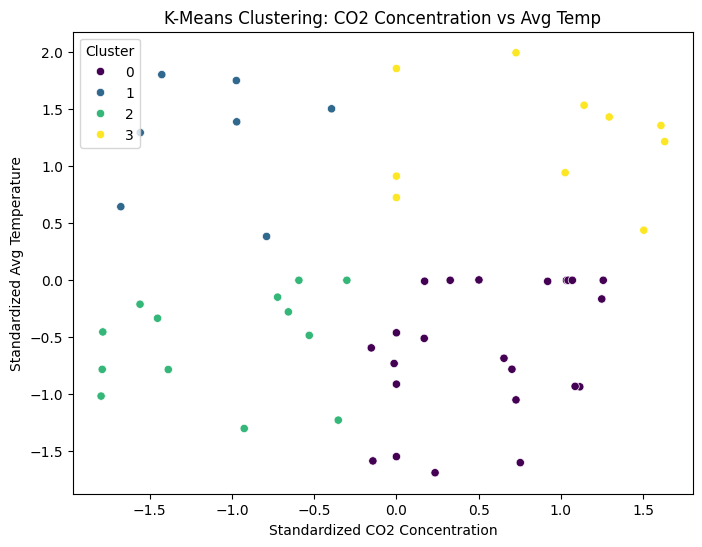

In [19]:
# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=climate_data['Cluster'], palette='viridis')
plt.title('K-Means Clustering: CO2 Concentration vs Avg Temp')
plt.xlabel('Standardized CO2 Concentration')
plt.ylabel('Standardized Avg Temperature')
plt.show()

In [20]:
# Silhouette Plot to evaluate clustering
silhouette_avg = silhouette_score(X_scaled, climate_data['Cluster'])
print(f'Silhouette Score for clustering: {silhouette_avg}')

Silhouette Score for clustering: 0.37588658803442565


In [21]:
# 4. Linear Regression Line Fitting (e.g., predicting Avg_Temp from CO2_Concentration)
X = climate_data[['CO2_Concentration (ppm)']].dropna()
y = climate_data['Avg_Temp (°C)'].dropna()

In [22]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

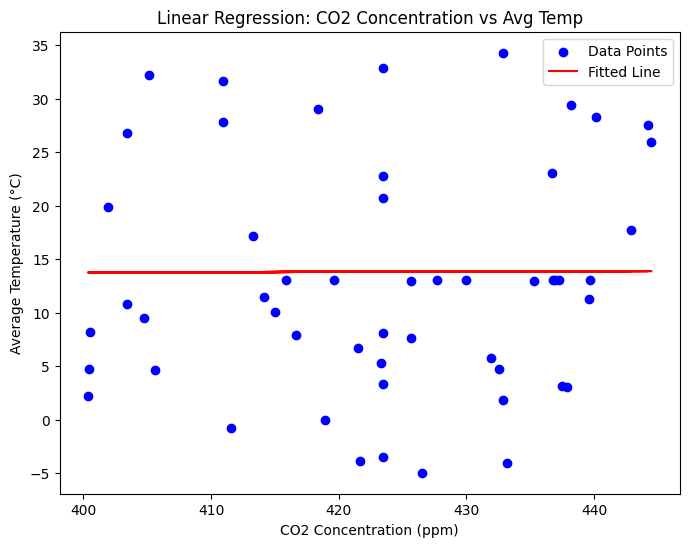

In [23]:
# Plotting the regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.title('Linear Regression: CO2 Concentration vs Avg Temp')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()